# *Monod* demonstration: fit to neural cell types

In the current notebook, we run the *Monod* inference pipeline on eight pre-clustered mouse brain cell datasets, disaggregated into GABAergic and glutamatergic cell types, using a common set of 3,000 genes, a $20\times 21$ grid, and four models (bursty, constitutive, extrinsic, and CIR-like).

## Metadata and prerequisites

In [1]:
import time
t1 = time.time()

Define the dataset metadata and disk locations.

In [2]:
subcluster_names = ['l23it','l5it','l6it', 'l56np', 'l6ct']
dataset_names = ['allen_B08_'+y  for y in subcluster_names] 
loom_filepaths = ['/home/ggorin/count_data/loom_allen_celltype_kb/test/'+x+'.loom' for x in dataset_names] 

transcriptome_filepath = '/home/ggorin/projects/seq-cme-technoise/polyA_ref/gg_200524_mouse_genome_polyA_cum_1'
attribute_names=['spliced','unspliced','gene_name','barcode']

In [3]:
import sys
sys.path.insert(0, '/home/ggorin/projects/monod/src/')
import monod
from monod.preprocess import *
from monod.extract_data import extract_data
import monod.cme_toolbox as cme_toolbox
from monod.cme_toolbox import CMEModel
import monod.inference as inference
from monod.inference import InferenceParameters, GradientInference
import monod.analysis as analysis
from monod.analysis import *

## Preprocessing

Construct a batch by finding 3,000 genes which have at least moderate expression across all datasets. Visualize the set of genes (purple) that meet the expression filtering criteria.

In [35]:
dir_string,dataset_strings = construct_batch(loom_filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./fits',meta='allen_celltypes',batch_id=1,\
                                             n_genes=3000,viz=False)

INFO:root:Beginning data preprocessing and filtering.
INFO:root:Dataset: allen_B08_l23it
INFO:root:621 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:5864 genes retained after expression filter.
INFO:root:Dataset: allen_B08_l5it
INFO:root:1702 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:6759 genes retained after expression filter.
INFO:root:Dataset: allen_B08_l6it
INFO:root:471 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:5773 genes retained after expression filter.
INFO:root:Dataset: allen_B08_l56np
INFO:root:191 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:4268 genes retained after expression filter.
INFO:root:Dataset: allen_B08_l6ct
INFO:root:1359 cells detected.
INFO:root:32285 features observed, 32005 match genome anno

Define the models to analyze.

In [36]:
models = ('Bursty','CIR','Extrinsic')

In [37]:
n_models = len(models)
n_datasets = len(dataset_names)

## Inference

Define parameter bounds, then iterate over datasets and models and perform the fits.

This is easily parallelized.

In [38]:
print('hi')

hi


In [39]:
# lb = [[-2.0, -2, -2],
#       [-2.0, -1.8, -1.8],
#       [-2.0, -1.8, -1.8]]
# ub = [[4.2, 2.5, 3.5],
#       [4.2, 2.5, 3.5],
#       [4.2, 2.5, 3.5]]
# grid = [1,1]

def par_fun(x):
    models = ('Bursty','CIR','Extrinsic')
    n_models = len(models)
    fp,tx,dn,ds,dirs,att = x
    print(x[0])
    for j in range(n_models):
        print(models[j])
        fitmodel = CMEModel(models[j],'None')
        inference_parameters = InferenceParameters([-2.0, -2.0, -2.0],[4.2, 2.5, 3.5],[1,1],[1,1],[1,1],\
                    ds,fitmodel,use_lengths = False,
                    gradient_params = {'max_iterations':10,'init_pattern':'moments','num_restarts':1})
        if j==0:
            search_data = extract_data(fp,tx,dn,
                                ds,dirs,dataset_attr_names=att)
        else:
            search_data = load_search_data(ds+'/raw.sd')
        full_result_string = inference_parameters.fit_all_grid_points(1,search_data)
        result_strings.append(full_result_string)
    return result_strings
try:
    pool = multiprocessing.Pool(processes=5)
    iterable = zip(loom_filepaths,[transcriptome_filepath]*n_datasets,dataset_names,dataset_strings,\
        [dir_string]*n_datasets,[attribute_names]*n_datasets)
    result_strings = pool.map(par_fun, iterable)
    pool.close()
    pool.join()
except:
    pool.terminate()
    pool.join()


/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l5it.loom/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l23it.loom/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l56np.loom/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l6ct.loom/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l6it.loom




BurstyBurstyBurstyBurstyBursty




INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Global inference parameters stored to ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/Bursty_None_1x1/parameters.pr.
INFO:root:Global inference parameters stored to ./fits/gg_220802_022_allen_celltypes_

INFO:root:Runtime: 169.1 seconds.
Extrinsic
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Global inference parameters stored to ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l56np/Extrinsic_None_1x1/parameters.pr.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l56np/raw.sd.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Runtime: 35.1 seconds.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Runtime: 247.1 seconds.
Extrinsic
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Global inference parameters stored to ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6it/Extrinsic_None_1x1/parameters.pr.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6it/raw.sd.
INFO:root:Starting n

In [40]:
# dir_string = './fits/gg_220802_022_allen_celltypes_1'
sd_strings = [dir_string+'/'+x+'/raw.sd' for x in dataset_names]
sd_arr = [load_search_data(x) for x in sd_strings]


INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l23it/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6it/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l56np/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6ct/raw.sd.


Select the result strings corresponding to the bursty model, which will be used for differential regulation analysis.

In [41]:
# result_strings = [dir_string+'/'+x+'/Bursty_Poisson_20x21/grid_scan_results.res' for x in dataset_names]
# n_datasets = len(result_strings)

In [42]:
models

('Bursty', 'CIR', 'Extrinsic')

In [43]:
result_strings = [[dir_string+'/'+x+'/'+y+'_None_1x1/grid_scan_results.res' for x in dataset_names] for y in models]

In [44]:
# result_strings = [list(np.asarray(result_strings)[range(i,n_datasets*n_models,n_models)]) for i in range(n_models)]

In [45]:
sr_arr = []


for j in range(n_datasets):
#     sd = sd_arr[j]
    sr_ = []
    for k in range(n_models):
        loaded_res = load_search_results(result_strings[k][j])
        loaded_res.find_sampling_optimum()
        sr_.append(loaded_res)
    
    make_batch_analysis_dir(sr_,dir_string)
#     sd_arr.append(sd)
    sr_arr.append(sr_)


INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l23it/Bursty_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l23it/CIR_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l23it/Extrinsic_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/Bursty_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/CIR_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/Extrinsic_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6it/Bursty_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen

0
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l23it.png.
1
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l5it.png.
2
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l6it.png.
3
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l56np.png.
4
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l6ct.png.


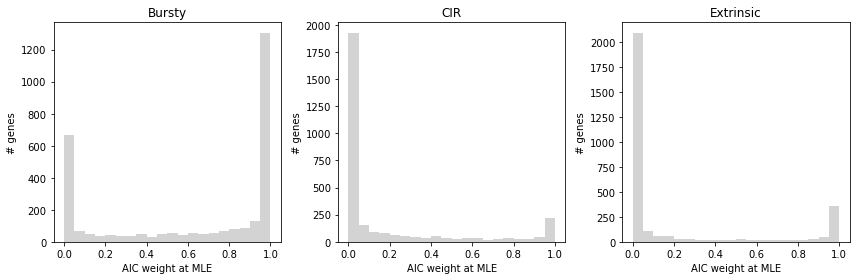

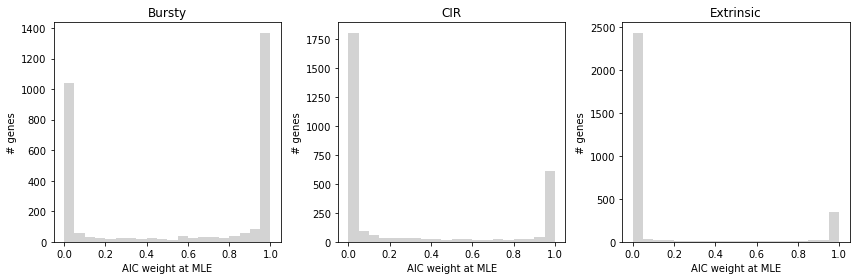

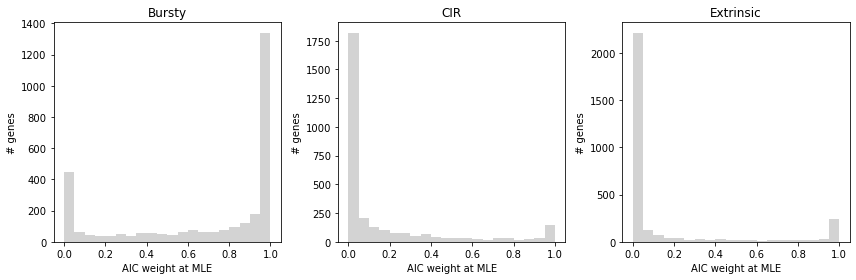

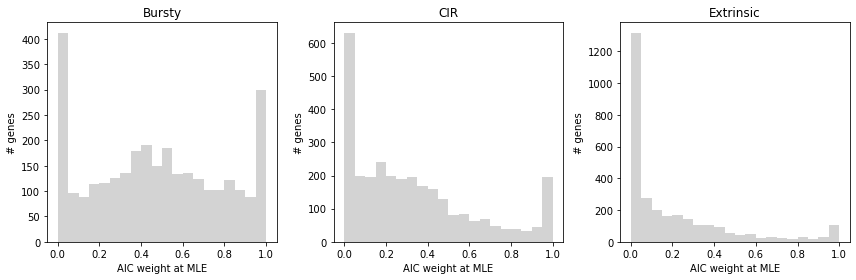

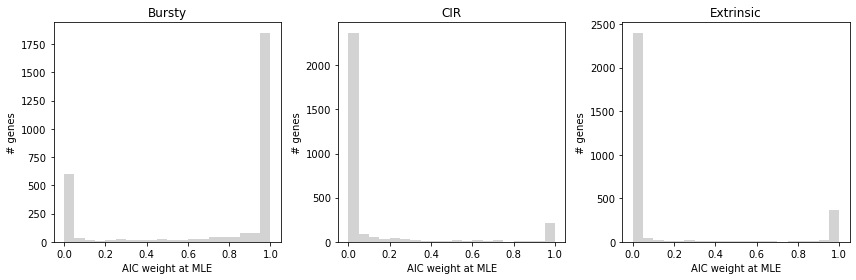

In [46]:
w = []
for j in range(n_datasets):
    print(j)
    w_ = plot_AIC_weights(sr_arr[j],sd_arr[j],models,meta=dataset_names[j],savefig=True)
    w.append(w_)

In [47]:
w = np.asarray(w)

In [48]:
# import plotly
# import plotly.express as px
# import pandas as pd

In [427]:
# thr = 0.8
gf_gou = (w[:,0,:]>0.9).all(0)
gf_cir = (w[:,1,:]>0.5).all(0)
gf_ext = (w[:,2,:]>0.8).all(0)

In [428]:
gf_gou.sum()

224

In [429]:
gf_cir.sum()

52

In [430]:
gf_ext.sum()

77

In [431]:
gn = sd_arr[0].gene_names

In [432]:
gf_cir.sum()+gf_gou.sum()+gf_ext.sum()

353

In [433]:
len(gn)

3000

In [434]:
gfs = [gf_gou,gf_cir,gf_ext]

In [435]:
chisq_thr = 5
gene_inds_kept = []
# for model_ind in range(1,2):
for model_ind in range(n_models):
    n_genes = gfs[model_ind].sum()
    gene_inds = np.where(gfs[model_ind])[0]
    keep = np.zeros((n_genes,n_datasets),dtype=bool)
    pval = np.zeros((n_genes,n_datasets))
    for gene_count,gene_ind in enumerate(gene_inds):
        for dataset in range(n_datasets):
            lm = [sd_arr[dataset].M[gene_ind], sd_arr[dataset].N[gene_ind]]
            pars = sr_arr[dataset][model_ind].phys_optimum[gene_ind]
            expect_freq = sr_arr[dataset][model_ind].model.eval_model_pss(pars,lm) * sd_arr[dataset].n_cells
            
            unique_values,counts = np.unique(np.vstack(\
                       (sd_arr[dataset].U[gene_ind],sd_arr[dataset].S[gene_ind])).astype(int),axis=1,\
                        return_counts=True) #create the dataset of observed counts
            expect_freq = expect_freq[unique_values[0],unique_values[1]]
                #the added bin accounts for all the stuff that's not in the 
                #observed categories
            expect_freq = np.concatenate((expect_freq,[sd_arr[dataset].n_cells-expect_freq.sum()]))
            counts = np.concatenate((counts,[0])) 
            
            filt = (expect_freq>chisq_thr) & (counts>chisq_thr)
            observed = np.concatenate((counts[filt],[counts[~filt].sum()]))
            proposed = np.concatenate((expect_freq[filt],[expect_freq[~filt].sum()])) #this is incredibly severe.
            csq = scipy.stats.mstats.chisquare(observed, proposed, 3) #3 dof because models have 3 parameters...
            pval[gene_count,dataset] = csq.pvalue
            if csq.pvalue>0.01:
                keep[gene_count,dataset] = True
                
    gene_inds_kept.append(gene_inds[keep.all(1)])


In [436]:
# pval[keep.all(1),:]

In [437]:
[len(x) for x in gene_inds_kept]

[33, 15, 21]

In [438]:
np.where(gn=='Pura')

(array([2487]),)

blue is GOU (model 0), red is CIR (model 1)

In [454]:
ds=1

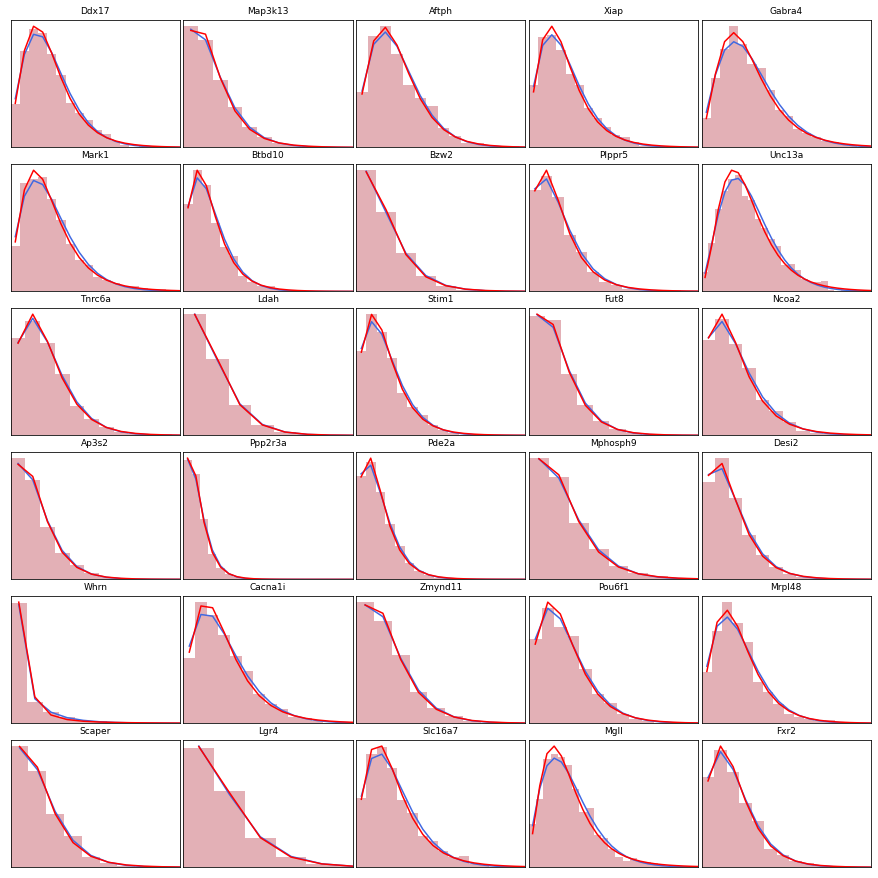

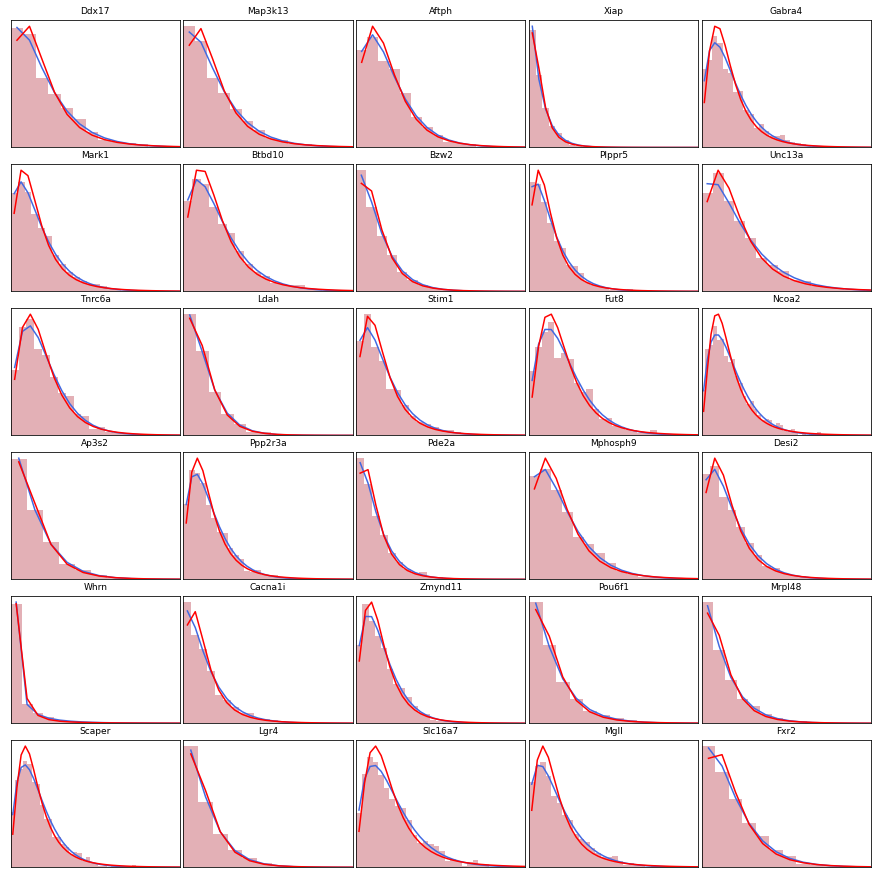

In [455]:
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[0],\
                           sz=(6,5),figsize=(12,12),
                           marg='mature')
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[0],\
                           sz=(6,5),figsize=(12,12),
                           marg='nascent')

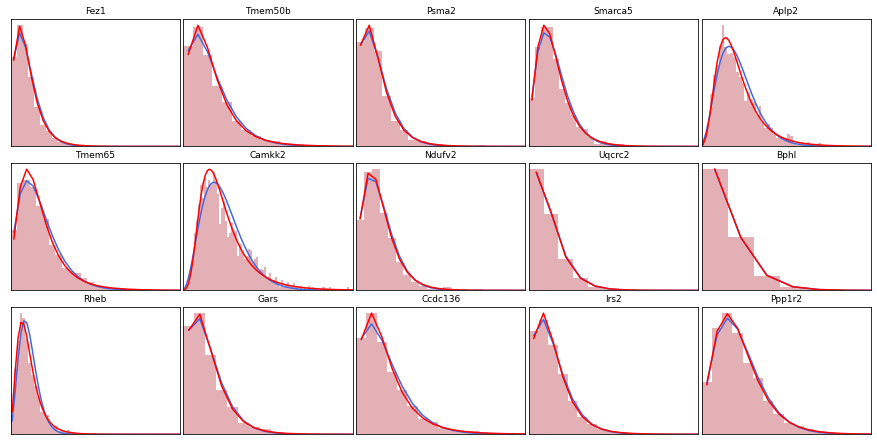

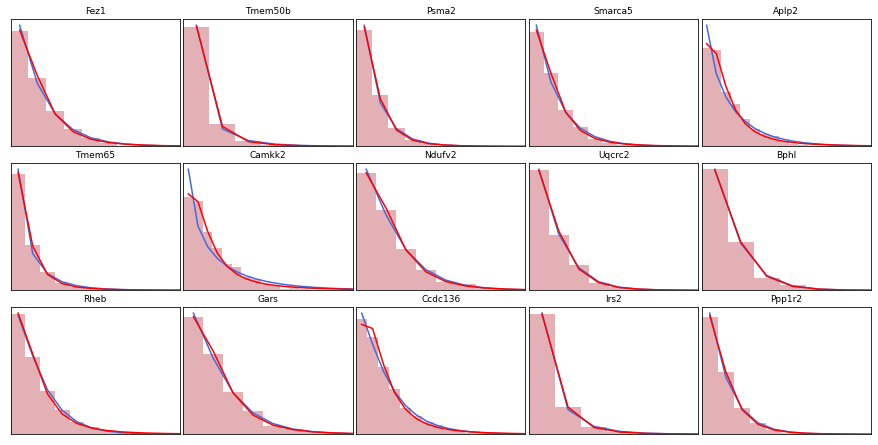

In [456]:
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[1],\
                           sz=(3,5),figsize=(12,6),
                           marg='mature')
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[1],\
                           sz=(3,5),figsize=(12,6),
                           marg='nascent')

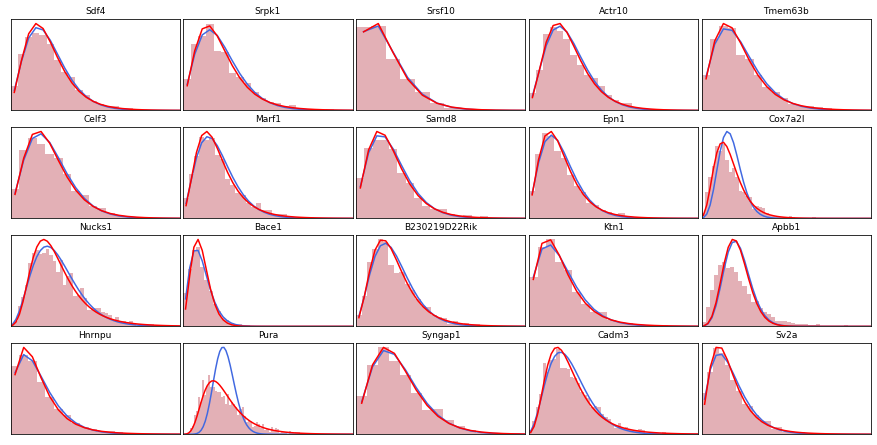

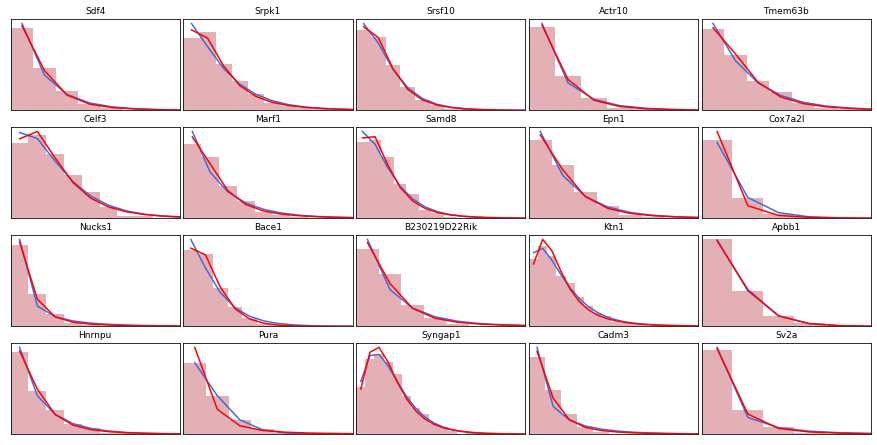

In [457]:
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[2],\
                           sz=(4,5),figsize=(12,6),
                           marg='mature')
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[2],\
                           sz=(4,5),figsize=(12,6),
                           marg='nascent')

Also the "extrinsic" genes, but now red is extrinsic

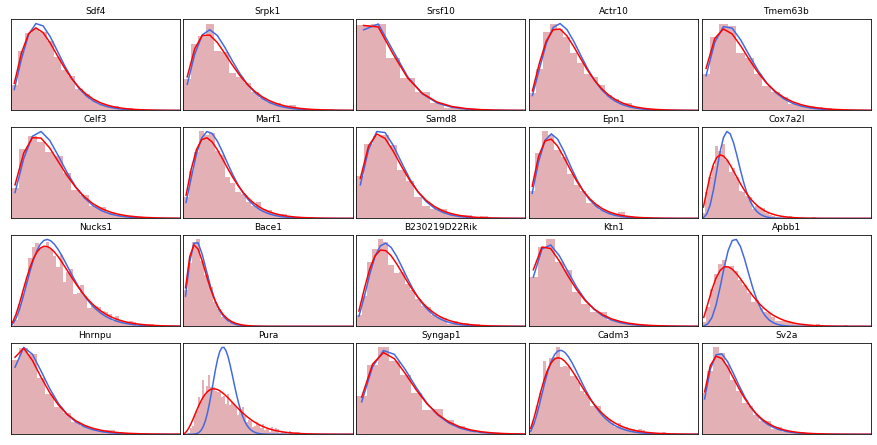

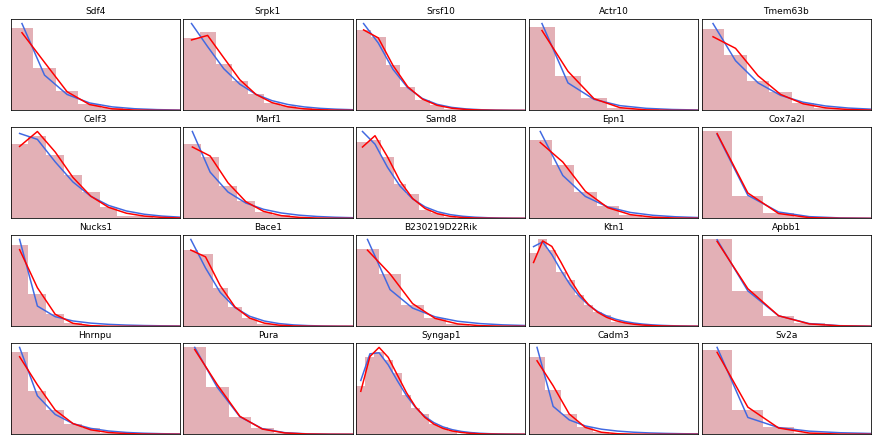

In [458]:
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][2]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[2],\
                           sz=(4,5),figsize=(12,6),
                           marg='mature')
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][2]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[2],\
                           sz=(4,5),figsize=(12,6),
                           marg='nascent')

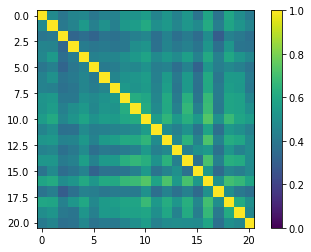

In [470]:
plt.imshow(np.corrcoef(sd_arr[ds].S[gene_inds_kept[2]]),vmin=0,vmax=1)
plt.colorbar()

In [460]:
# gn[gene_inds_kept[1]]

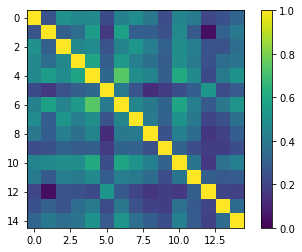

In [469]:
plt.imshow(np.corrcoef(sd_arr[ds].S[gene_inds_kept[1]]),vmin=0,vmax=1)
plt.colorbar()

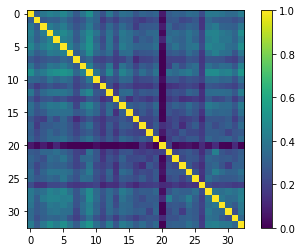

In [468]:
plt.imshow(np.corrcoef(sd_arr[ds].S[gene_inds_kept[0]]),vmin=0,vmax=1)
plt.colorbar()

In [34]:
time.time()-t1

758.443329334259

In [463]:
results = []
for model_ind in range(n_models):
    data = {'meta':models[model_ind],'genes':gn[gene_inds_kept[model_ind]],'aic':w[:,:,gene_inds_kept[model_ind]]}
    n_genes = len(data['genes'])
    pars = np.zeros((n_genes,n_datasets,3))
    for gene_count,gene_ind in enumerate(gene_inds_kept[model_ind]):
        for dataset in range(n_datasets):
            pars[gene_count,dataset] = sr_arr[dataset][model_ind].phys_optimum[gene_ind]
    data['pars'] = pars
    results.append(data)


In [464]:
with open('/home/ggorin/projects/GVFP_2021/fits/gg_220802_022_allen_celltypes_1/weights_and_genes.pickle','wb') as rfs:
    pickle.dump(data,rfs)